In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings 
warnings.filterwarnings('ignore')
sns.set()

In [2]:
df=pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
df.shape

(200, 5)

In [6]:
df.size

1000

In [7]:
df.index

RangeIndex(start=0, stop=200, step=1)

In [8]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [14]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [12]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [13]:
df.duplicated().sum()

0

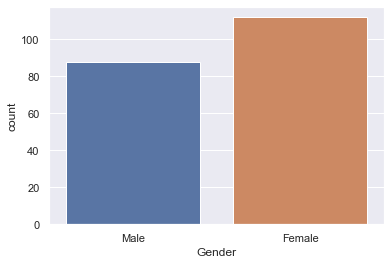

In [23]:
sns.countplot(x='Gender',data=df);

<AxesSubplot:xlabel='Age', ylabel='count'>

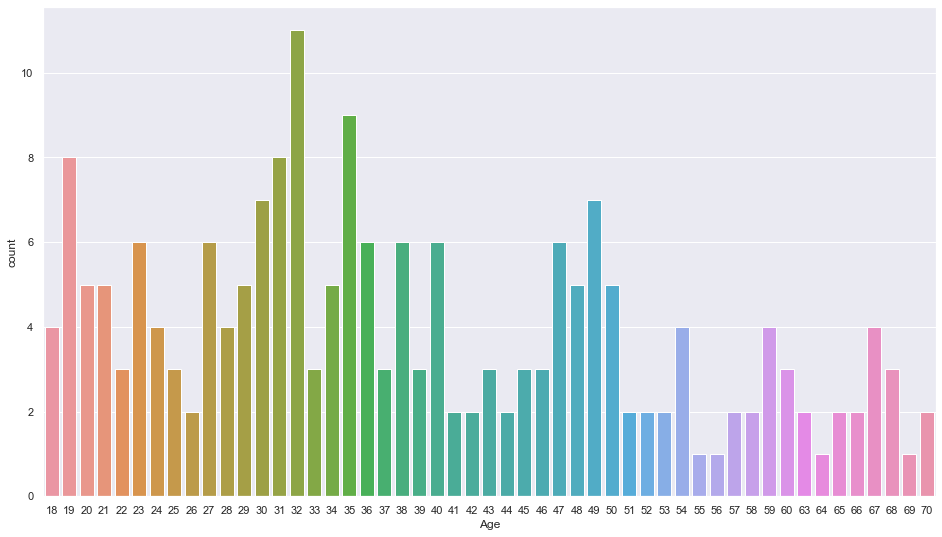

In [24]:
plt.figure(figsize=(16,9))
sns.countplot(x='Age',data=df)

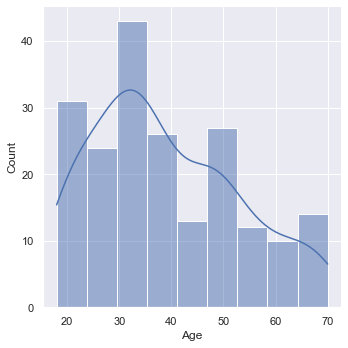

In [25]:
sns.displot(df['Age'],kde=True);

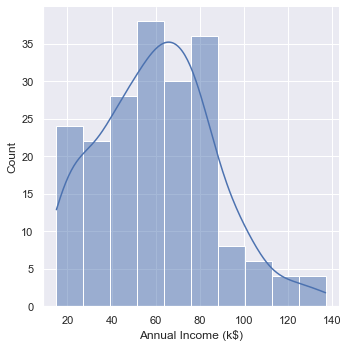

In [27]:
sns.displot(df['Annual Income (k$)'],kde=True)

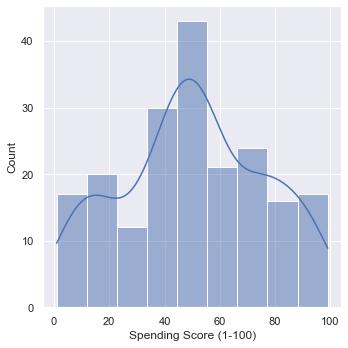

In [28]:
sns.displot(df['Spending Score (1-100)'],kde=True)

In [29]:
df.drop(columns='CustomerID',inplace=True,axis='columns')

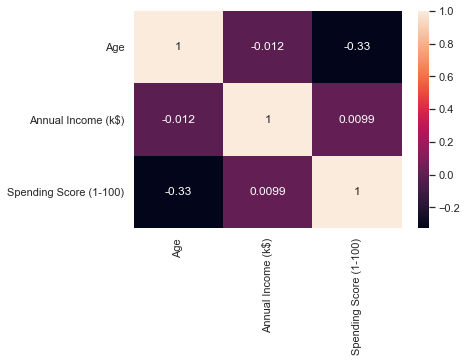

In [32]:
sns.heatmap(df.corr(),annot=True);

In [33]:
#Two Clustering
df1=df[['Annual Income (k$)','Spending Score (1-100)']]

In [34]:
df1.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


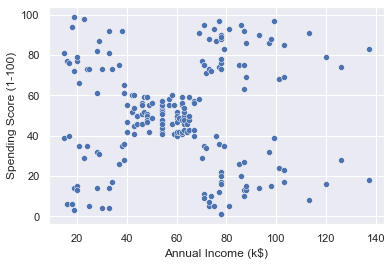

In [35]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df1);

In [38]:
#Kmeans Clustering

In [37]:
errors=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df1)
    errors.append(kmeans.inertia_)

In [39]:
#Elbow Method

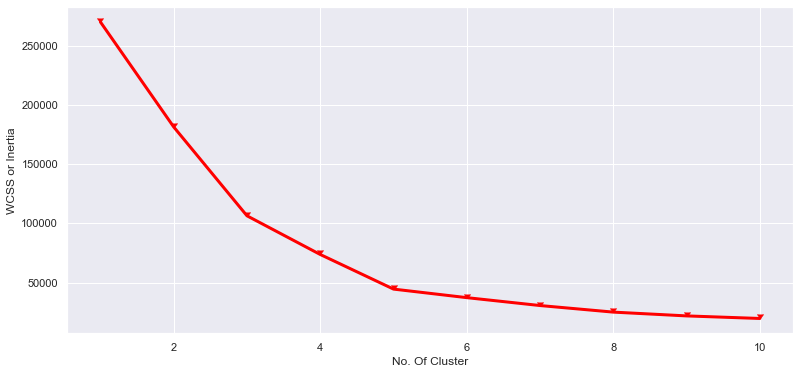

In [41]:
plt.figure(figsize=(13,6))
plt.plot(range(1,11),errors)
plt.plot(range(1,11),errors,linewidth=3,color='red',marker=7)
plt.xlabel('No. Of Cluster')
plt.ylabel('WCSS or Inertia')
plt.plot();

In [44]:
kmeans=KMeans(n_clusters=6)
kmeans.fit(df1)
y=kmeans.predict(df1)
df1['label']=y
df1.head()

,Annual Income (k$),Spending Score (1-100),label
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


In [45]:
#Label means we have partitioned the customer into which cluster

In [46]:
df['label'].value_counts()

0    81
1    35
5    29
2    23
4    22
3    10
Name: label, dtype: int64

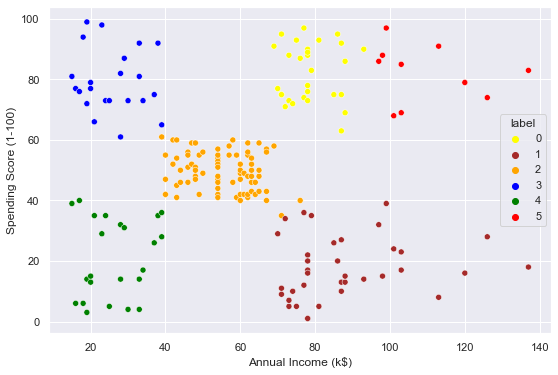

In [52]:
plt.figure(figsize=(9,6))
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df1,hue='label',palette=['yellow','brown','orange','blue','green','red']);

In [54]:
#So there are total 6 Groups(Cluster)  of my Customer according to income and spending Beahaviour same way can make cluster on 3 Features